## Experiment of feature-extraction

### 1. Mel-spectrogram 

original method

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa 
import librosa.display
import IPython.display as ipd
import noisereduce as nr

# Audio params
SAMPLE_RATE = 22050  # (samples/sec)
DURATION = 5.0  # duration in second (sec)
AUDIO_LEN = int(SAMPLE_RATE * DURATION)  # total number of samples in DURATION

# Spectrogram params
N_MELS = 128  # freq axis, number of filters
N_FFT = 2048  # frame size
HOP_LEN = 512  # non-overlap region, which means 1/4 portion overlapping
SPEC_WIDTH = AUDIO_LEN // HOP_LEN + 1  # time axis
FMAX = SAMPLE_RATE // 2  # max frequency, based on the rule, it should be half of SAMPLE_RATE
SPEC_SHAPE = [N_MELS, SPEC_WIDTH]  # expected output spectrogram shape

def load_audio(filepath, sr=SAMPLE_RATE):  # load the audio
    audio, sr = librosa.load(filepath, sr=sr)
    return audio, sr

def plot_audio(audio, sr=SAMPLE_RATE):  # Plot in time domain
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

def get_spectrum(audio, sr=SAMPLE_RATE):  # Plot in frequency domain
    sp = np.fft.fft(audio)
    ampSP = np.abs(sp)
    
    # Calculate the frequency axis
    freq_axis = np.fft.fftfreq(len(sp), 1 / sr)
    
    # the magnitude spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(freq_axis[:len(freq_axis)//2], ampSP[:len(freq_axis)//2])  # Only plot the positive frequencies
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.grid(True)
    plt.show()

def listen_audio(audio, sr=SAMPLE_RATE):  # Listen to audio file
    ipd.display(ipd.Audio(audio, rate=sr))

def get_mel_spectrogram(audio, sr=SAMPLE_RATE):  # Get the mel-spectrogram
    spec = librosa.feature.melspectrogram(y=audio, sr=sr, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
    spec = librosa.power_to_db(spec)  # Turn into log-scale
    return spec

def plot_mel_spectrogram(spec, sr=SAMPLE_RATE):  # Plot the mel-spectrogram
    fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    return fig

def plot_all(audio): 
    print('# Listen')
    listen_audio(audio)

    print("# Plot\n")
    # plt.figure(figsize=(18, 5))

    # plt.subplot(121)
    plot_audio(audio)
    # plt.title("Waveform",fontsize=17)

    # plt.subplot(122)
    get_spectrum(audio)
    # plt.xlabel('Frequency (Hz)')
    # plt./ylabel('Magnitude')
    # plt.title('Magnitude Spectrum')
    # plt.g/rid(True)
    # plt.show()

    # plt.figure(figsize=(12, 5))
    spec = get_mel_spectrogram(audio) 
    
    plot_mel_spectrogram(spec)
    plt.title("Spectrogram",fontsize=17)
    plt.show()

# Data preprocessing
# Use threshold to delete the low-volume data
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate / 10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask, y_mean

# Min-Max normalize
def normalize_audio(audio):
    return (audio - np.min(audio)) / (np.max(audio) - np.min(audio))

def denoise(audio, sr=SAMPLE_RATE):
    reduced_noise = nr.reduce_noise(y=audio, sr=sr, stationary=True, prop_decrease=0.95, n_fft=N_FFT)
    return reduced_noise

In [11]:
print(AUDIO_LEN)

110250


(128, 216) <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Spectrogram')

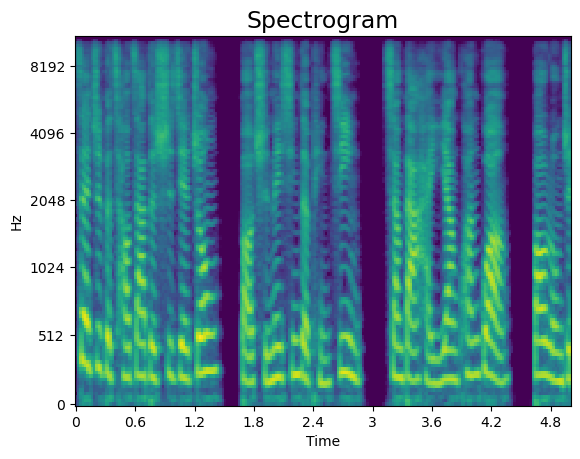

In [12]:
audio, sr = load_audio("t_feature_extraction_output_9.wav", SAMPLE_RATE)
audio = audio[:AUDIO_LEN]
spec = get_mel_spectrogram(audio)  
print(spec.shape, type(spec))
plot_mel_spectrogram(spec)
plt.title("Spectrogram",fontsize=17)

### 2. MFCC

In [47]:
mfcc = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=13, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
print(mfcc.shape)

(13, 216)


### 3. Chroma

In [51]:
chroma = librosa.feature.chroma_stft(y=audio, sr=SAMPLE_RATE, n_chroma=12, n_fft=N_FFT, hop_length=HOP_LEN)
print(chroma.shape)


(12, 216)


Plot all

In [52]:
def plot_melspec_mfcc_chroma(mel_spec, mfcc, chroma):
    # Plot the features
    plt.figure(figsize=(15, 5))

    # Plot Mel-spectrogram
    plt.subplot(1, 3, 1)
    librosa.display.specshow(spec, x_axis='time', y_axis='mel', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')

    # Plot MFCC
    plt.subplot(1, 3, 2)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    plt.colorbar()
    plt.title('MFCC')

    # Plot Chroma
    plt.subplot(1, 3, 3)
    librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    plt.colorbar()
    plt.title('Chroma')

    plt.tight_layout()
    plt.show()

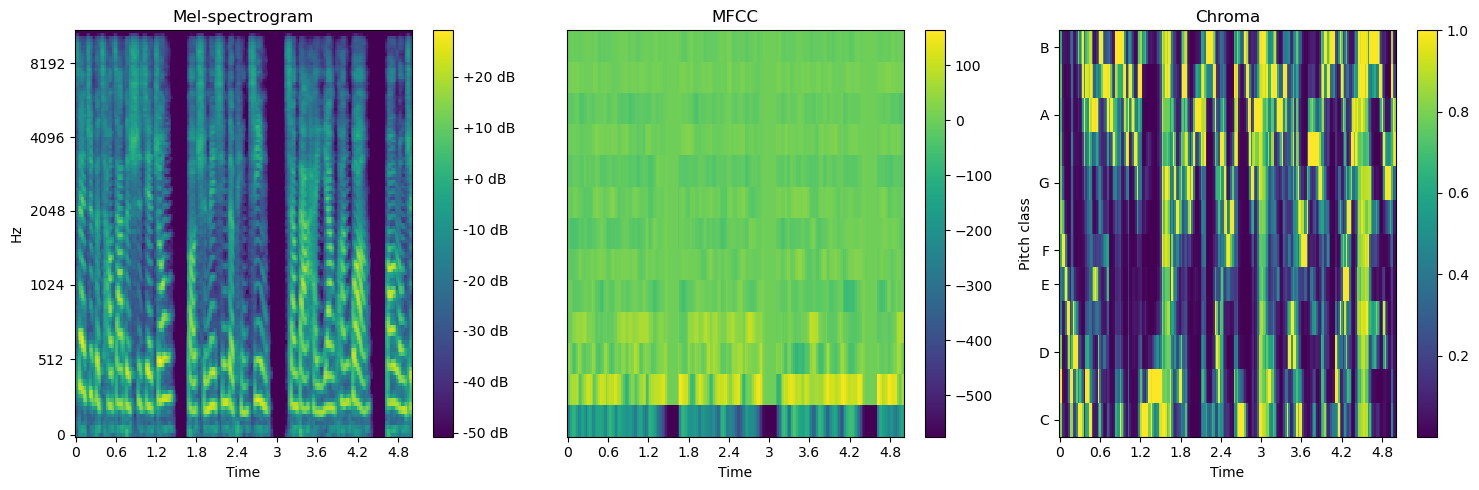

In [53]:
plot_melspec_mfcc_chroma(spec, mfcc, chroma)
